In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_fscore_support, f1_score, roc_curve, \
auc, precision_recall_curve, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from inspect import signature

import seaborn as sns

In [2]:
data_all = pd.read_csv('Data.csv')

In [3]:
data_all['normalizedAmount'] = StandardScaler().fit_transform(data_all['Amount'].values.reshape(-1,1))
# data_all['normalizedTime'] = StandardScaler().fit_transform(data_all['Time'].values.reshape(-1,1))
data_all.drop(['Amount', 'Time'], axis=1, inplace=True)

In [4]:
data_all.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,-0.489190,0.783289,-1.659097,-1.366814,2.576846,3.513254,0.271305,1.304641,-0.238853,-0.730979,...,-0.058456,-0.214896,0.222998,0.675950,-0.632860,-0.530017,0.345872,0.221294,0,-0.205108
1,1.293556,-1.302381,-2.241085,0.393974,0.680825,0.821662,0.501478,0.104208,0.111651,0.087403,...,0.359432,0.443179,-0.230091,-1.583791,-0.157257,0.477317,-0.104101,-0.039292,0,0.814352
2,-0.755894,0.121305,0.852314,-2.303416,-0.233670,-0.244191,-0.285440,0.424009,-1.072689,-0.548953,...,0.438709,1.034433,-0.232698,0.531213,0.100623,-0.203575,-0.007693,0.050117,0,-0.304594
3,2.038750,-0.159488,-1.096570,0.425224,-0.214944,-1.151940,0.107112,-0.250273,0.701067,0.092863,...,-0.291320,-0.766838,0.353433,-0.042129,-0.352271,0.203878,-0.075910,-0.061540,0,-0.360037
4,0.951025,3.252926,-5.039105,4.632411,3.014501,-1.349570,0.980940,-1.819539,-2.099049,-1.347557,...,1.404524,-0.760549,0.358292,-1.185942,-1.286177,0.000365,0.169662,0.108276,1,-0.388521


In [5]:
train = data_all.drop(['Class'], axis=1)
label = data_all['Class']

In [6]:
train_set, test_set, train_label, test_label = train_test_split(train, label, test_size=0.2)

In [7]:
print(len(train_set), 'train examples') 
print(len(test_set), 'test examples') 

1120 train examples
280 test examples


no. of hidden layers, no. of hidden units, learning rate, 
no. of iterations and mini-batch size

## DNN 

In [8]:
model = keras.Sequential([
    keras.layers.Dense(29, activation='relu', input_shape=(29,)),
    keras.layers.Dense(64, activation='relu'), # --> dense mean fully connected layer
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
adam = keras.optimizers.Adam(learning_rate=0.003)
model.compile(optimizer=adam, loss='binary_crossentropy',
             metrics=['accuracy'])

In [9]:
history = model.fit(train_set, train_label, batch_size=64, epochs=20, validation_split=0.2)

Train on 896 samples, validate on 224 samples
Epoch 1/20
896/896 [==============================] - 1s 870us/sample - loss: 0.4362 - accuracy: 0.7946 - val_loss: 0.2566 - val_accuracy: 0.9375
Epoch 2/20
896/896 [==============================] - 0s 56us/sample - loss: 0.2058 - accuracy: 0.9364 - val_loss: 0.1947 - val_accuracy: 0.9330
Epoch 3/20
896/896 [==============================] - 0s 57us/sample - loss: 0.1467 - accuracy: 0.9475 - val_loss: 0.1774 - val_accuracy: 0.9464
Epoch 4/20
896/896 [==============================] - 0s 53us/sample - loss: 0.1169 - accuracy: 0.9542 - val_loss: 0.1838 - val_accuracy: 0.9286
Epoch 5/20
896/896 [==============================] - 0s 52us/sample - loss: 0.1032 - accuracy: 0.9632 - val_loss: 0.2053 - val_accuracy: 0.9554
Epoch 6/20
896/896 [==============================] - 0s 52us/sample - loss: 0.0909 - accuracy: 0.9688 - val_loss: 0.2052 - val_accuracy: 0.9286
Epoch 7/20
896/896 [==============================] - 0s 51us/sample - loss: 0.0788

In [10]:
train_loss, train_acc  = model.evaluate(train_set, train_label)
print('Trained Acc: ', train_acc)
print('Trained Loss: ', train_loss)

1120/1120 [==============================] - 0s 36us/sample - loss: 0.1101 - accuracy: 0.9866
Trained Acc:  0.98660713
Trained Loss:  0.1100695909566379


In [196]:
test_loss, test_acc  = model.evaluate(test_set, test_label)
print('Tested Acc: ', test_acc)
print('Tested Loss: ', test_loss)

280/280 [==============================] - 0s 48us/sample - loss: 0.3613 - accuracy: 0.9464
Tested Acc:  0.9464286
Tested Loss:  0.36126516674246106


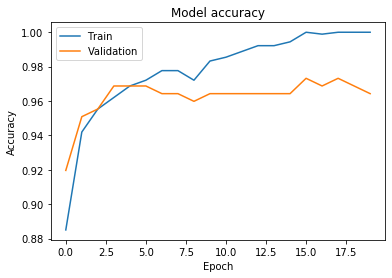

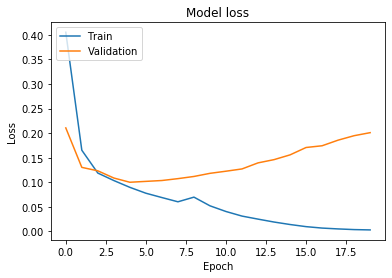

In [197]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [214]:
# train confusion matrix
train_pred = np.round(model.predict(train_set))
cm_train = confusion_matrix(train_label, train_pred)

Text(0.5, 1, 'Train Confusion Matrix')

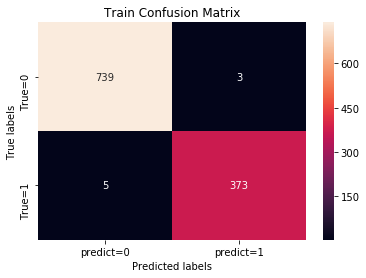

In [215]:
ax= plt.subplot()
matrix = sns.heatmap(cm_train, annot=True, ax = ax, fmt='d',
           xticklabels=['predict=0', 'predict=1'],
           yticklabels=['True=0', 'True=1']) #annot=True to annotate cells
bottom, top = matrix.get_ylim()
matrix.set_ylim(bottom + 0.5, top - 0.5)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Train Confusion Matrix')

In [216]:
# validation confusion matrix
test_pred = np.round(model.predict(test_set))
cm_test = confusion_matrix(test_label, test_pred)

Text(0.5, 1, 'Validation Confusion Matrix')

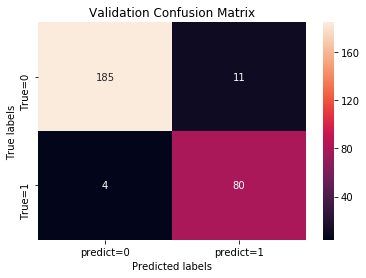

In [217]:
ax2= plt.subplot()
matrix2 = sns.heatmap(cm_test, annot=True, ax = ax2, fmt='d',
           xticklabels=['predict=0', 'predict=1'],
           yticklabels=['True=0', 'True=1']) #annot=True to annotate cells
bottom, top = matrix2.get_ylim()
matrix2.set_ylim(bottom + 0.5, top - 0.5)

ax2.set_xlabel('Predicted labels')
ax2.set_ylabel('True labels')
ax2.set_title('Validation Confusion Matrix')

In [218]:
precision, recall, fscore, _= precision_recall_fscore_support(test_label, test_pred)
print('\033[1mClass 0\033[0m')
print('Precision: ', precision[0])
print('Recall: ', recall[0])
print('F-score: ', fscore[0])
print('\033[1mClass 1\033[0m')
print('Precision: ', precision[1])
print('Recall: ', recall[1])
print('F-score: ', fscore[1])
print('\033[1mAverage\033[0m')
print('Precision: ', np.average(precision))
print('Recall: ', np.average(recall))
print('F-score: ', np.average(fscore))

Class 0
Precision:  0.9788359788359788
Recall:  0.9438775510204082
F-score:  0.9610389610389609
Class 1
Precision:  0.8791208791208791
Recall:  0.9523809523809523
F-score:  0.9142857142857143
Average
Precision:  0.928978428978429
Recall:  0.9481292517006803
F-score:  0.9376623376623376


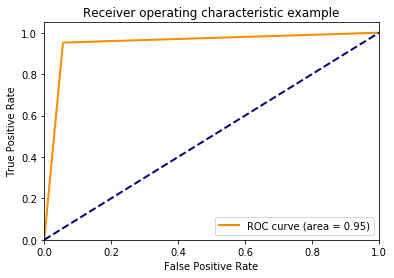

In [219]:
# ROC curve plot
fpr, tpr, _ = roc_curve(test_label, test_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

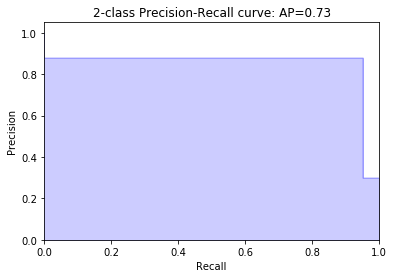

In [220]:
# Precision recall curve
precision, recall, _ = precision_recall_curve(test_label, test_pred)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          np.average(precision)))
plt.show()

In [221]:
hidden_data = pd.read_csv('test_no_Class.csv')
hidden_data['normalizedAmount'] = StandardScaler().fit_transform(hidden_data['Amount'].values.reshape(-1,1))
hidden_data.drop(['Amount', 'Time'], axis=1, inplace=True)
hidden_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,normalizedAmount
0,0.754316,2.379822,-5.137274,3.818392,0.043203,-1.285451,-1.766684,0.756711,-1.765722,-3.263007,...,0.369663,0.397058,0.141165,0.171985,0.394274,-0.444642,-0.263189,0.304703,-0.044362,-0.518233
1,-14.179165,7.421370,-21.405836,11.927512,-7.974281,-2.202710,-15.471612,-0.356595,-6.380125,-13.348278,...,1.002764,-2.366836,1.130955,0.991153,-1.033132,-0.327179,0.634693,2.171905,-1.395288,-0.522556
2,2.252971,-1.177596,-2.030634,-2.541761,-0.176900,-0.218932,-0.599820,-0.092448,0.654035,0.125140,...,-0.567323,-0.084275,0.439982,-0.119047,-0.316948,0.376866,0.109228,-0.001400,-0.074179,-0.461310
3,-3.859881,2.632881,-5.264265,3.446113,-0.675231,-1.904959,-3.291041,-0.985766,-1.168114,-3.936294,...,-0.178626,1.664119,0.785075,0.068412,0.778961,-0.863166,-0.006810,-1.065734,1.773326,-0.521778
4,1.864985,-0.974664,-1.018447,-0.916147,-0.420071,0.059545,-0.592456,0.109244,1.363402,-0.279865,...,0.040632,0.176293,0.439613,0.077999,0.287905,-0.296394,0.654480,-0.068849,-0.048382,-0.098980


In [222]:
hidden_pred = np.round(model.predict(hidden_data))

In [223]:
with open('T08902201_answer_test.txt','w') as f:
    i=0
    for pred in hidden_pred:
        row = str(int(pred[0])) + '\n'
        i = i + 1
        f.write(row)

## Decision Tree

In [224]:
tree = DecisionTreeClassifier()
tree = tree.fit(train_set, train_label)
tree_pred = tree.predict(test_set)

Accuracy: 0.9142857142857143
Precision: 0.9777777777777777
Recall: 0.8979591836734694
F1_score: 0.9361702127659575


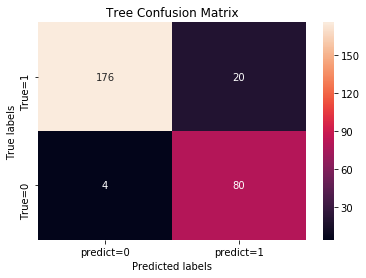

In [225]:
# Decision Tree confusion matrix
tree_cm = confusion_matrix(test_label, tree_pred)

tp = tree_cm[0, 0]; tn = tree_cm[1, 1]
fp = tree_cm[1, 0]; fn = tree_cm[0, 1]

p = tp/(tp+fp)
r = tp/(tp+fn)
print("Accuracy:", accuracy_score(test_label, tree_pred))
print('Precision:', p)
print('Recall:', r)
print('F1_score:', (2*p*r)/ (p + r))

ax= plt.subplot()
matrix = sns.heatmap(tree_cm, annot=True, ax = ax, fmt='d',
           xticklabels=['predict=0', 'predict=1'],
           yticklabels=['True=1', 'True=0']) #annot=True to annotate cells
bottom, top = matrix.get_ylim()
matrix.set_ylim(bottom + 0.5, top - 0.5)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Tree Confusion Matrix')
plt.show()

## Random forest

In [226]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(train_set, train_label)
rf_pred = rf.predict(test_set)

In [227]:
feature_imp = pd.Series(rf.feature_importances_,index=train_set.columns).sort_values(ascending=False)

No handles with labels found to put in legend.


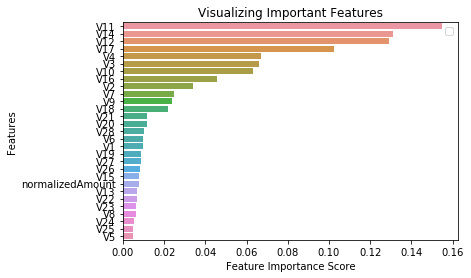

In [228]:
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

Accuracy: 0.9571428571428572
Precision: 0.9693877551020408
Recall: 0.9693877551020408
F1_score: 0.9693877551020408


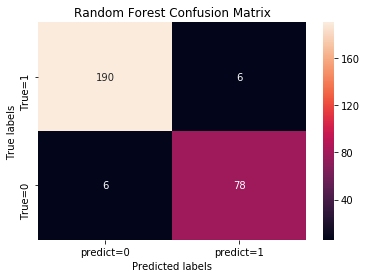

In [229]:
# Random Forest confusion matrix
rf_cm = confusion_matrix(test_label, rf_pred)

tp = rf_cm[0, 0]; tn = rf_cm[1, 1]
fp = rf_cm[1, 0]; fn = rf_cm[0, 1]

p = tp/(tp+fp)
r = tp/(tp+fn)
print("Accuracy:", accuracy_score(test_label, rf_pred))
print('Precision:', p)
print('Recall:', r)
print('F1_score:', (2*p*r)/ (p + r))

ax= plt.subplot()
matrix = sns.heatmap(rf_cm, annot=True, ax = ax, fmt='d',
           xticklabels=['predict=0', 'predict=1'],
           yticklabels=['True=1', 'True=0']) #annot=True to annotate cells
bottom, top = matrix.get_ylim()
matrix.set_ylim(bottom + 0.5, top - 0.5)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Random Forest Confusion Matrix')
plt.show()